In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("benchmark general.xlsx")
df["Algoritmo - Heuristica"] = df["Algoritmo"] + ": " + df["Heuristica"].fillna("")

### Promedio de nodos expandidos por algoritmo y dificultad

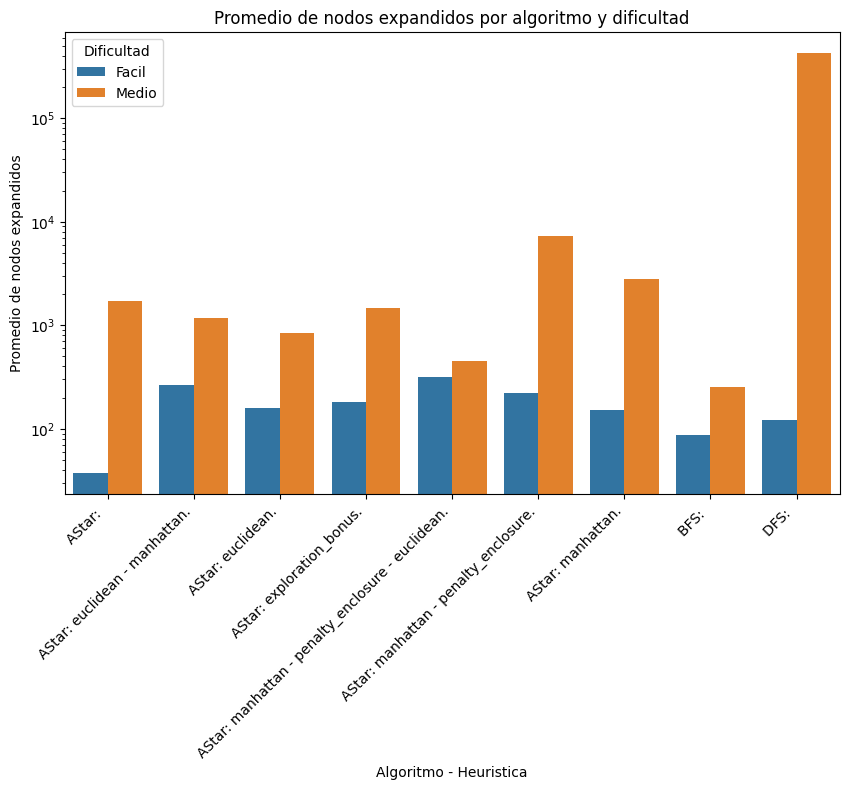

In [48]:
# Gráfico de nodos expandidos por algoritmo
df_grouped = df.groupby(['Dificultad', 'Algoritmo - Heuristica'], as_index=False)['nodes_expanded'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x="Algoritmo - Heuristica", y="nodes_expanded", hue="Dificultad", data=df_grouped)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Promedio de nodos expandidos")
plt.title("Promedio de nodos expandidos por algoritmo y dificultad")
plt.yscale("log") # Escala logarítmica para diferencias grandes
plt.show()

- **DFS (Medio)** sobresale con una cantidad descomunal de nodos expandidos, alcanzando hasta **10⁶** nodos. Esto indica una **ineficiencia extrema**, especialmente en tableros más difíciles, probablemente por **ciclos o exploración sin control**.

- **A\* con heurísticas combinadas** (“AStar”) tiene un rendimiento muy eficiente, expandiendo menos nodos que las configuraciones de heurísticas individuales, especialmente en dificultad Fácil.

- **Heurísticas individuales de A***, como manhattan, penalty_enclosure, etc., muestran un aumento notable de nodos expandidos en dificultad Media, con algunos (como manhattan - penalty_enclosure - euclidean) alcanzando valores cercanos a **10⁴**.

- **BFS** tiene un rendimiento bastante alto, lo que es contradictorio considerando la naturaleza del algoritmo, que debería expandir más nodos. La razón por la que da la ilusión de explorar poco es que **BFS solo pudo resolver algunos tableros**; casualmente aquellos en donde sus competidores expandieron más. Al no lograr completar otros tableros, los registros vacíos no se tomaron en cuenta para el gráfico.


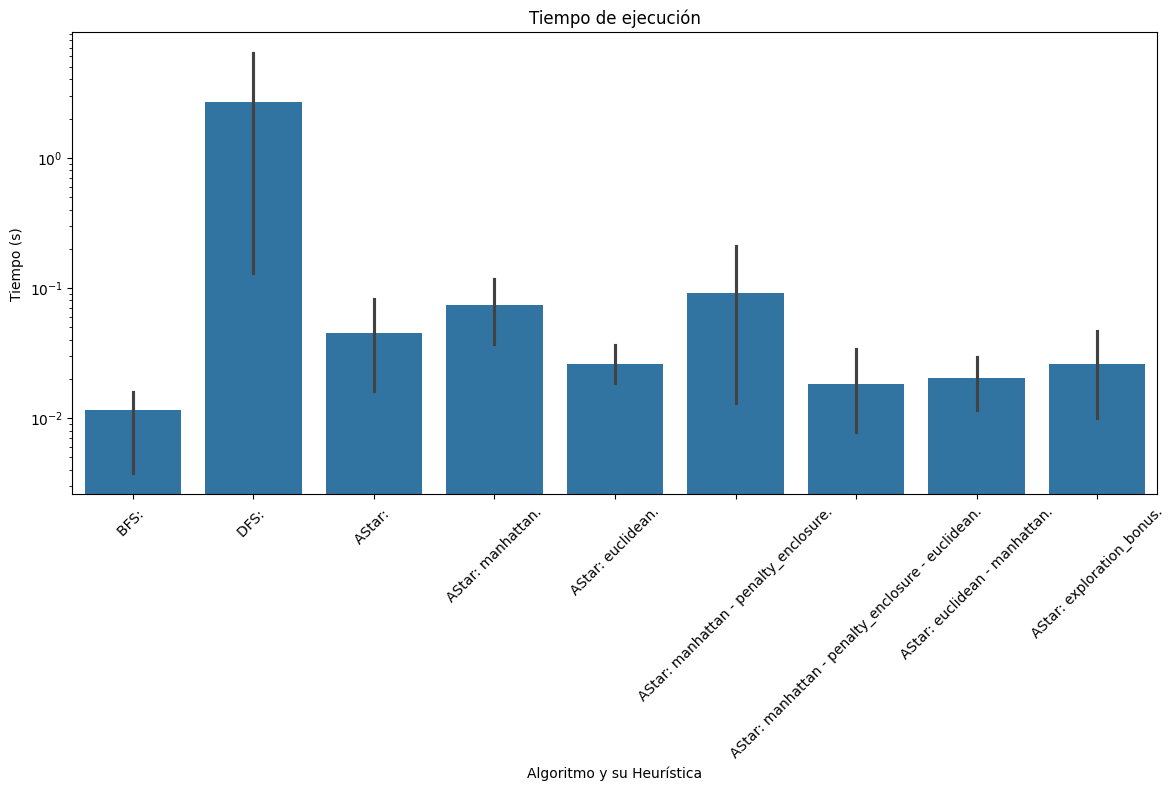

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x="Algoritmo - Heuristica", y="running_time", data=df)
plt.title("Tiempo de ejecución")
plt.ylabel("Tiempo (s)")
plt.xlabel("Algoritmo y su Heurística")
plt.yscale("log") # Escala logarítmica para diferencias grandes
plt.xticks(rotation=45)
plt.show()


- **DFS** tiene el peor tiempo de ejecución promedio, con alta varianza. En algunos casos llega a **más de 10 segundos**, lo cual es extremadamente ineficiente.

- **A\* con Heurísticas combinadas** (“AStar”) presenta **tiempos bajos (~0.03s)** y poca varianza, mostrando ser el mejor balance entre costo de cómputo y rendimiento.

- **Heurísticas diferentes**, como manhattan - penalty_enclosure, aunque eficientes en teoría, tienen tiempos de ejecución más altos, lo cual sugiere que **combinarlas no siempre da mejores resultados** si no están bien sintonizadas.

- **BFS**, parece rápido pero solo resolvió pocos tableros (como se mencionó), así que su eficiencia es ilusoria.

### Relación nodos expandidos vs tiempo

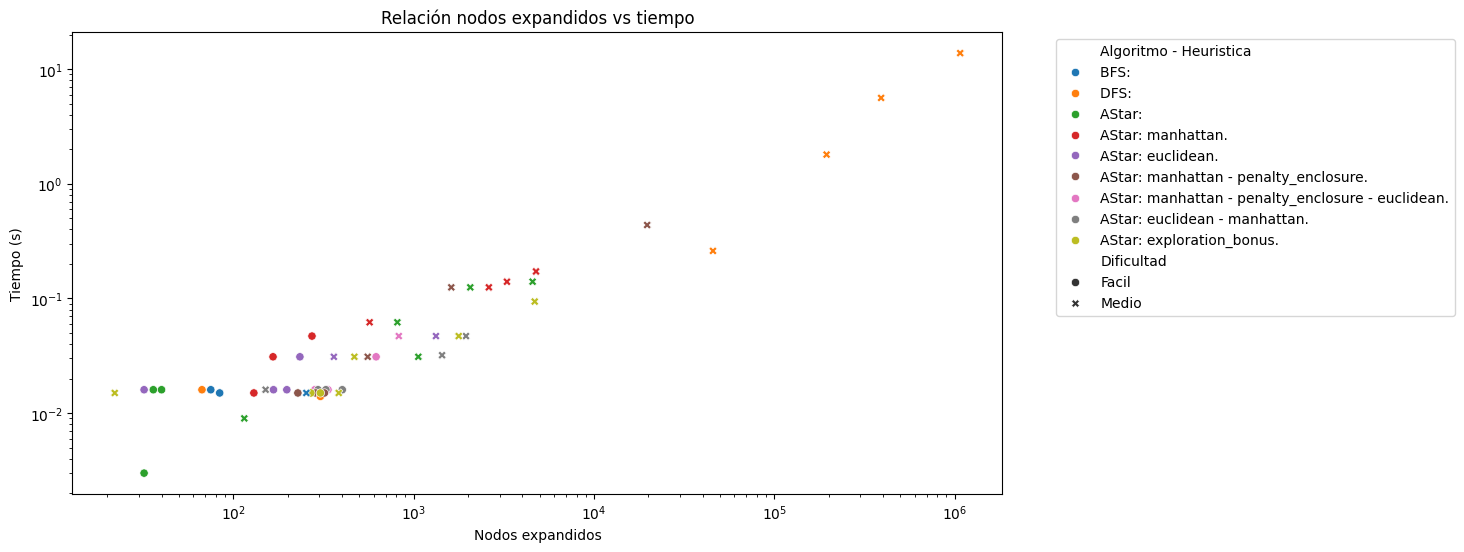

In [54]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="nodes_expanded", y="running_time", hue="Algoritmo - Heuristica", style="Dificultad", data=df)
plt.title("Relación nodos expandidos vs tiempo")
plt.xlabel("Nodos expandidos")
plt.ylabel("Tiempo (s)")
plt.xscale("log")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- Existe una **relación clara entre el número de nodos expandidos y el tiempo de ejecución**. A mayor cantidad de nodos, mayor tiempo, lo cual era esperable.

- Las configuraciones con **A\* y heurísticas múltiples** aparecen agrupadas **en el rango bajo de ambos ejes** (poco tiempo y pocos nodos), lo cual es ideal.

- **DFS (color naranja)** sobresale con puntos extremos en nodos y tiempo. Esto **valida empíricamente su ineficiencia** para tableros medianamente complejos.

- Estrategias como **manhattan - penalty_enclosure - euclidean** tienen puntos dispersos, lo que indica que **su desempeño varía más según el tablero**.

- Algunas configuraciones de **heurísticas individuales** (como euclidean - manhattan) tienen puntos eficientes, pero **más dispersos**, lo que sugiere **menos consistencia**.

## Conclusiones y Highlights

### Lo mejor: **A\* con exploration bonus**

- **Buena cantidad de nodos expandidos en promedio**, logrando eficiencia tanto en tableros fáciles como medianos.  
- **Excelente rendimiento en tiempo de ejecución**, con baja varianza, mostrando gran consistencia.  
- **Balance ideal entre costo de cómputo y efectividad**, gracias al exploration bonus que guía mejor la búsqueda y evita expansiones innecesarias.  
- Es la **opción más confiable** en resolución de tableros.

### Lo peor: **DFS**

- **Cantidad de nodos expandidos extremadamente alta** (hasta 1 millón en dificultad Media).  
- **Tiempo de ejecución elevado y muy variable**, mostrando ineficiencia extrema.  
- **No completó algunos niveles**, descartándolo para tableros medianamente complejos o grandes.

### BFS: eficiencia engañosa

- Sus métricas de **bajo tiempo y nodos expandidos** solo se dan en los pocos tableros que resolvió.  
- **No logró resolver niveles más difíciles**, por lo que sus resultados no son representativos de un rendimiento confiable.
